# **생능 출판사 "으뜸 데이터 분석과 머신러닝"(개정판) 교재의 소스 코드**
## *9장 분류와 군집화*
---
* 출판사 : 생능 출판사( http://www.booksr.co.kr/ )
* 저자 : 박동규, 강영민, 김병욱
* 책의 소스코드 저장소 : https://github.com/dongupak/DataML
* 안내 : 이 노트북은 책의 코드를 담고 있습니다.
* 저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저서, 저자표기와 함께 배포해 주십시오.


### 9.1 분류와 군집화를 알아보자

### 9.2 로지스틱 회귀 모델과 시그모이드 함수

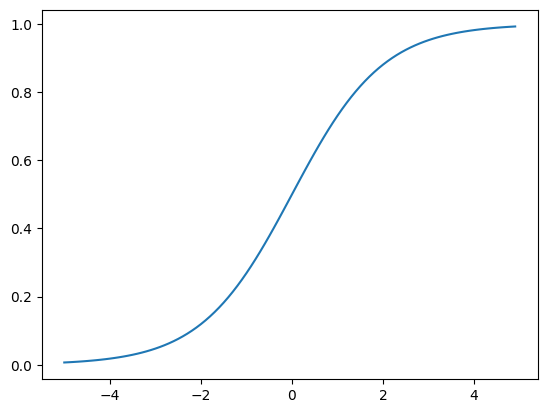

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
   return 1.0/(1.0 + np.exp(-x))

x = np.arange(-5., 5., 0.1)
plt.plot(x, sigmoid(x))

### 9.3 시그모이드 함수와 지수의 관계

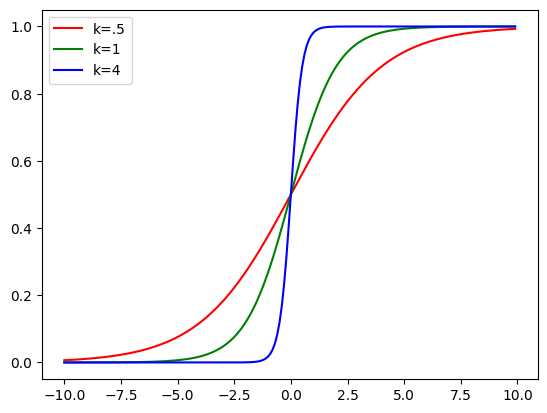

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, k):
   return 1.0/(1.0 + np.exp(-x*k))

x = np.arange(-10., 10., 0.1)
plt.plot(x, sigmoid(x, .5), 'r', label='k=.5')
plt.plot(x, sigmoid(x, 1), 'g', label='k=1')
plt.plot(x, sigmoid(x, 4), 'b', label='k=4')
plt.legend()

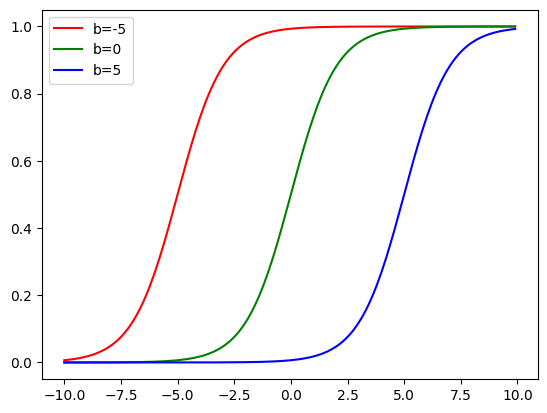

In [ ]:
def sigmoid(x, b):
  return 1.0/(1.0 + np.exp(-x + b))

x = np.arange(-10., 10., 0.1)
plt.plot(x, sigmoid(x, b=-5), 'r', label='b=-5')
plt.plot(x, sigmoid(x, b=0), 'g', label='b=0')
plt.plot(x, sigmoid(x, b=5), 'b', label='b=5')
plt.legend()

### 9.4 결정 경계와 교차 엔트로피

### 9.5 로지스틱 회귀 모델을 위한 데이터 만들기

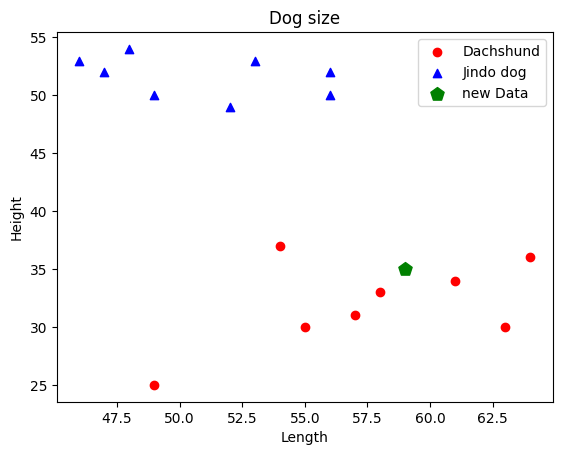

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
           c='g', label='new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

In [ ]:
import numpy as np

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링

j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

### 9.6 로지스틱 회귀 모델 구현하기

In [ ]:
import numpy as np

newdata = [[59, 35]]
dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))
dog_classes = {0:'닥스훈트', 1:'진돗개'}

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

f = LogisticRegression()
f.fit(dogs, labels)
w = f.coef_[0] # 계수
b = f.intercept_[0] # 절편
print('계수:', w)
print('절편:', b)
print('분류 정확도:', f.score(dogs, labels))

y_pred = f.predict(newdata) #predict 함수는 배열 형태로 리턴
y_pred_prob = f.predict_proba(newdata) #predict_proba 함수는 배열 형태로 리턴
print(f'데이터: {newdata}')
print(f'판정 결과: {dog_classes[y_pred[0]]}, 판정 확률: {y_pred_prob}')

계수: [-0.12468968  0.60519513]
절편: -19.029431563780225
분류 정확도: 1.0
데이터: [[59, 35]]
판정 결과: 닥스훈트, 판정 확률: [[0.99453708 0.00546292]]


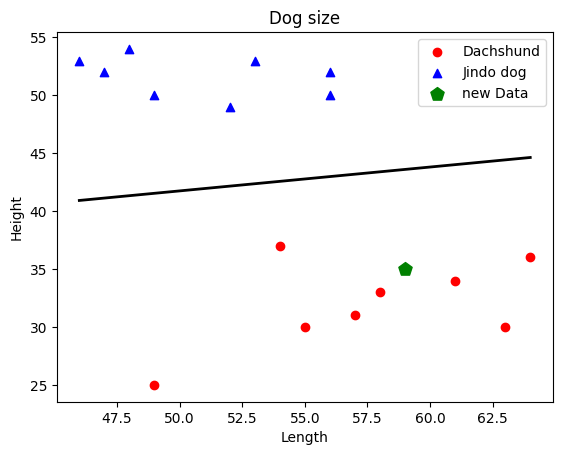

In [ ]:
plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
           c='g', label='new Data')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

x0 = np.linspace(np.min([dach_length, jin_length]),\
                 np.max([dach_length, jin_length]), 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
# 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로 => x1 = -w0/w1 * x0 - b/w1
plt.plot(x0, decision_boundary, "k-", linewidth=2)

In [ ]:
dach_0 = w[0]*dach_length[0] + w[1]*dach_height[0] + b
jin_0 = w[0]*jin_length[0] + w[1]*jin_height[0] + b
print('닥스훈트 샘플 대입 결과:', dach_0)
print('진돗개 샘플 대입 결과:', jin_0)

닥스훈트 샘플 대입 결과: -7.731510257649534
진돗개 샘플 대입 결과: 5.458092824004741


### 9.7 가까운 이웃으로 분류하는 k-NN 분류기

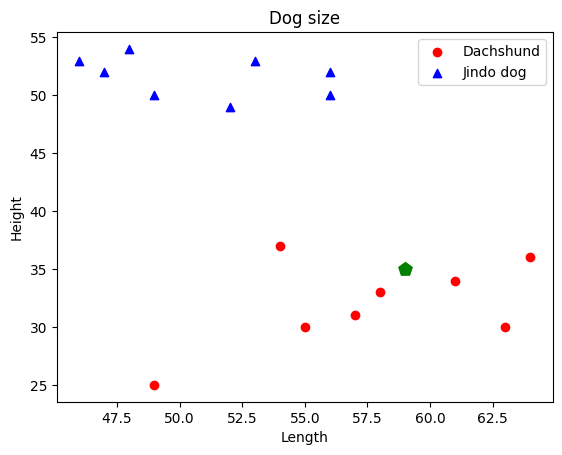

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')
plt.ylabel('Height')
plt.title("Dog size")
plt.legend(loc='upper right')

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
            c='g', label='new Data')

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]
newdata = [[59, 35]]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'}

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

데이터 [[59, 35]] , 판정 결과: 닥스훈트


### 9.8 k-NN 활용 예제 - 붓꽃 데이터 준비하기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:3]     # 최초 3개 데이터의 값을 출력

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
print('iris 데이터의 형태:', iris.data.shape)

iris 데이터의 형태: (150, 4)


In [ ]:
print('iris 데이터의 속성들:', iris.feature_names)

iris 데이터의 속성들: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('iris 데이터의 레이블:', iris.target)

iris 데이터의 레이블: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 9.9 k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
iris_df.values

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [ ]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return metrics.accuracy_score(y_test, y_pred)

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.933


### 9.10 새로운 꽃에 대해서 모델을 적용하고 분류해 보자



In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

k = 3
iris = load_iris()
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# 새로운 데이터를 제시해 보자.
X = [[4, 2, 1.3, 0.4],
     [4, 3, 3.2, 2.2]]
y = knn.predict(X)

print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]]))
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

[4, 2, 1.3, 0.4] 특성을 가지는 품종: setosa
[4, 3, 3.2, 2.2] 특성을 가지는 품종: versicolor


In [ ]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

n_neighbors가 3일때 정확도: 0.960


(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7d9abe5d0160>)

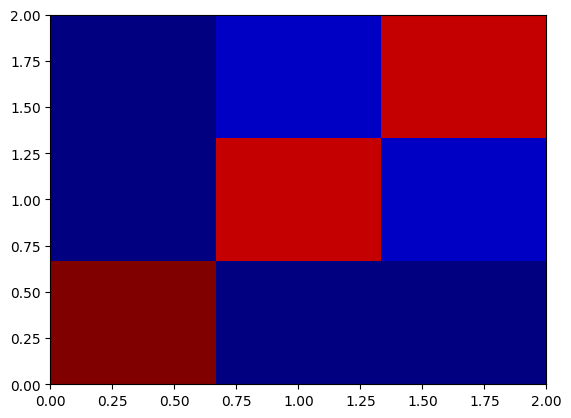

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)

(array([[50.,  0.,  0.],
        [ 0., 47.,  3.],
        [ 0.,  3., 47.]]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <matplotlib.collections.QuadMesh at 0x7d9abe44a650>)

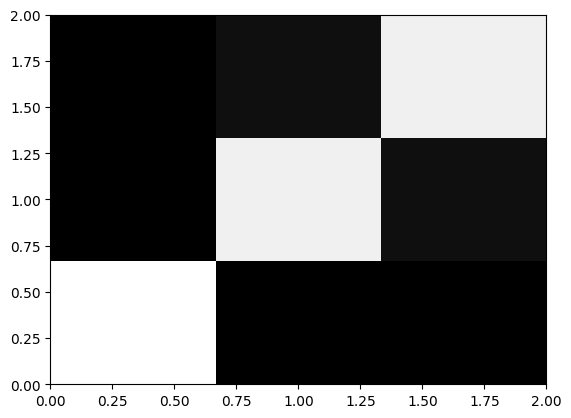

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.gray)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_result = confusion_matrix(iris.target,y_pred_all)
print(np.flip(conf_result, axis=0))

[[ 0  3 47]
 [ 0 47  3]
 [50  0  0]]


### 9.11 게임을 하는 고객의 군집을 만들어보자

### 9.12 데이터 전처리의 필요성

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
game_usage.head(3)

,time spent,game level
0,39,944
1,55,705
2,29,757


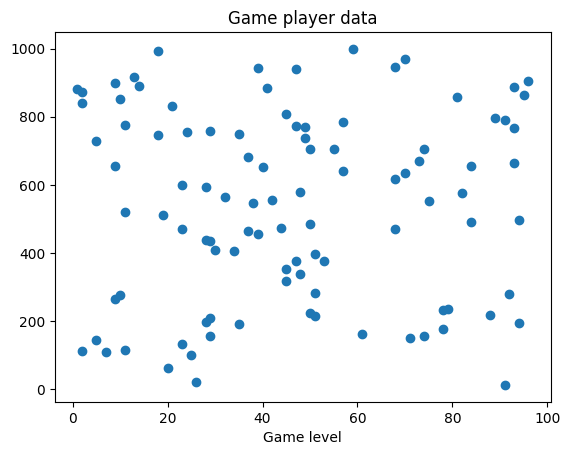

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level')
plt.scatter(X, Y)

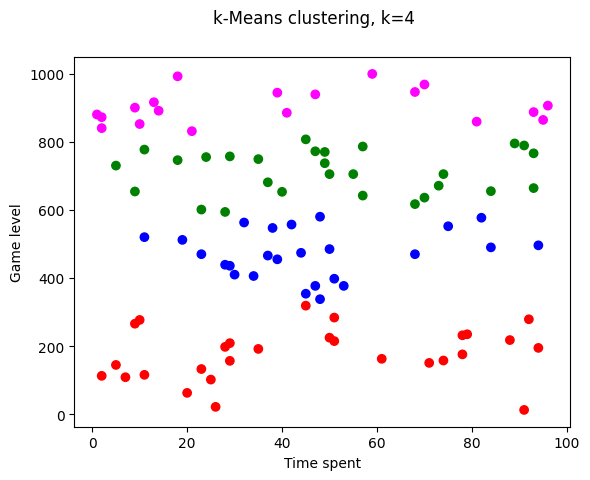

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
   model = cluster.KMeans(n_clusters=k, n_init=10)
   model.fit(data)
   labels = model.predict(data)
   colors = np.array(['red', 'green', 'blue', 'magenta'])
   plt.suptitle('k-Means clustering, k={}'.format(k))
   plt.xlabel('Time spent'), plt.ylabel('Game level')
   plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

#### 참고할 코드

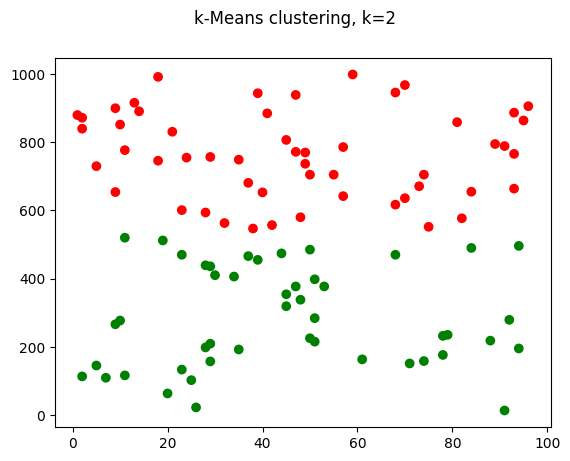

In [ ]:
# k = 2일때의 결과
from sklearn import cluster

gamer_data = np.column_stack((X, Y))

def kmeans_predict_plot(X, k):
    model = cluster.KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    labels = model.predict(X)
    colors = np.array(['red', 'green', 'blue', 'magenta'])
    plt.suptitle('k-Means clustering, k={}'.format(k))
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels])

kmeans_predict_plot(gamer_data, k = 2)

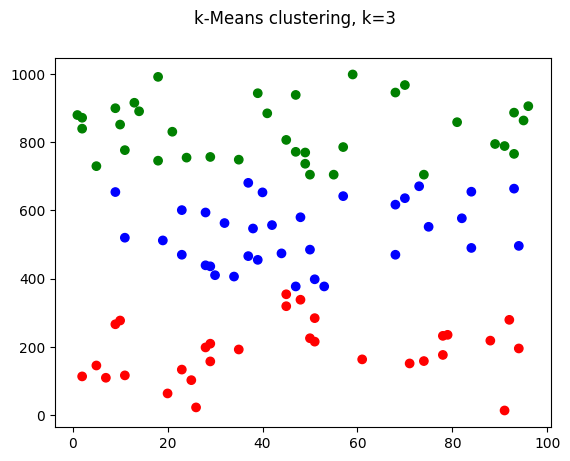

In [ ]:
 kmeans_predict_plot(gamer_data, k = 3) # 3개의 군집 생성

### 9.13 데이터 정규화 방법을 이용하자

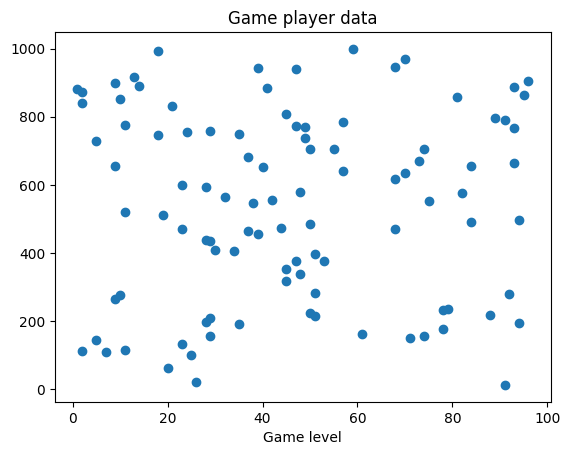

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_loc = 'https://github.com/dongupak/DataML/raw/main/csv/'
game_usage = pd.read_csv(data_loc + 'game_usage.csv')
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level')
plt.scatter(X, Y)

In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

(0.4731578947368421, 0.5324949290060852)

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max()

(0.0, 1.0)

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max()

(0.0, 1.0)

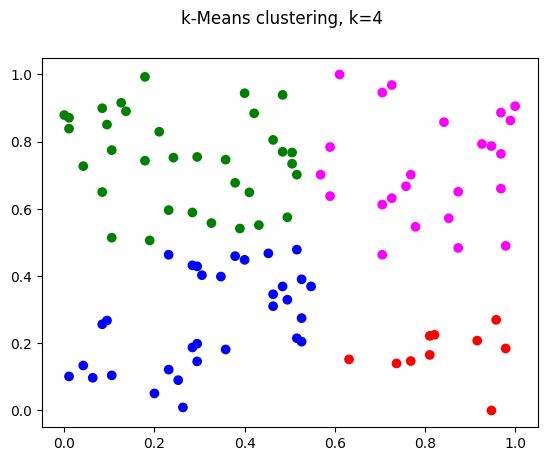

In [ ]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

### 9.14 다양한 스케일러 살펴보기

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

합계 : 48
평균 : 8.0
분산 : 4.0
표준편차 : 2.0


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

(1.0000000000000002, 1.0)

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

(-1.1435297153639113e-16, 1.1546319456101628e-16)

### 9.15 스케일러 사용시의 주의 사항

## 9.16 스케일러 사용 실전 사례 : 유방암 데이터셋

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터세트 읽어오기
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,\
                                             cancer.target,random_state=0)
# 학습 데이터 및 테스트 데이터 shape 출력
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print(f"스케일러 사용하지 않은 k-NN 정확도: {score:.2f}")

(426, 30) (143, 30) (426,) (143,)
스케일러 사용하지 않은 k-NN 정확도: 0.92


In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train) # 조정된 데이터로 kNN 학습

# 스케일 조정된 테스트 세트의 정확도
score = knn.score(X_test_scaled, y_test)
print(f"최대,최소값 스케일러 사용 후 k-NN 정확도: {score:.2f}")

최대,최소값 스케일러 사용 후 k-NN 정확도: 0.95


In [ ]:
# 표준 스케일러를 적용하자
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn.fit(X_train_scaled, y_train) # 조정된 데이터로 kNN 학습

# 스케일 조정된 테스트 세트의 정확도
score = knn.score(X_test_scaled, y_test)
print(f"표준 스케일러 사용 후 k-NN 정확도: {score:.2f}")

표준 스케일러 사용 후 k-NN 정확도: 0.94


### 9.17 붓꽃 데이터 집합을 k-평균 군집화 기법으로 분류하자

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()

all_features = ['sepal length', 'sepal width', 'petal length',\
                'petal width']
iris_df = pd.DataFrame(iris.data, columns=all_features)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# 꽃잎의 길이(petal length)와 너비(petal width) 특성만을 사용
feature_names = ['petal length', 'petal width']
feature = iris_df[feature_names]
feature.head(3)

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2


In [ ]:
km_model = KMeans(n_clusters=3, n_init=10)
km_model.fit(feature)

print(km_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
print('세 군집의 중심 좌표')
print('첫 번째 군집:', km_model.cluster_centers_[0])
print('두 번째 군집:', km_model.cluster_centers_[1])
print('세 번째 군집:', km_model.cluster_centers_[2])

세 군집의 중심 좌표
첫 번째 군집: [5.59583333 2.0375    ]
두 번째 군집: [1.462 0.246]
세 번째 군집: [4.26923077 1.34230769]


### 9.18 붓꽃 데이터 집합의 군집 중심을 알아보자

In [ ]:
features = ['petal length', 'petal width']
# iris_data에서 세 번째, 네 번째 열을 추출함
iris_df = pd.DataFrame(iris.data[:, [2, 3]], columns=features)
iris_df['target'] = pd.Series(iris.target)
print('종에 따라 달라지는 꽃잎 길이와 너비의 평균값')
print(iris_df.groupby('target').mean())

종에 따라 달라지는 꽃잎 길이와 너비의 평균값
        petal length  petal width
target                           
0              1.462        0.246
1              4.260        1.326
2              5.552        2.026


In [ ]:
feature_names = ['petal length', 'petal width']
feature = iris_df[feature_names]

km_model = KMeans(n_clusters=3, n_init=10)
km_model.fit(feature)

pred = km_model.predict(feature)
predict = pd.DataFrame(pred, columns=['cluster'])
print(predict.head())

   cluster
0        1
1        1
2        1
3        1
4        1


In [ ]:
df = pd.concat([feature, predict], axis = 1)
print(df.head())

   petal length  petal width  cluster
0           1.4          0.2        1
1           1.4          0.2        1
2           1.3          0.2        1
3           1.5          0.2        1
4           1.4          0.2        1


In [ ]:
centers = pd.DataFrame(km_model.cluster_centers_,\
                      columns=feature_names)
print(centers.head())

   petal length  petal width
0      5.595833     2.037500
1      1.462000     0.246000
2      4.269231     1.342308


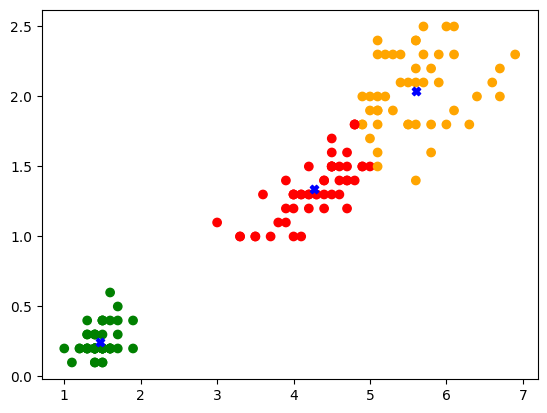

In [ ]:
import matplotlib.colors as mcolors

center_x = centers['petal length']  # 클러스터의 중심 x
center_y = centers['petal width']   # 클러스터의 중심 x
colors = ['orange', 'green', 'red'] # 클러스터의 색상

plt.scatter(df['petal length'], df['petal width'],
           c=df['cluster'], cmap = mcolors.ListedColormap(colors))
plt.scatter(center_x, center_y, marker='X', c='b')